**ANÁLISE DE DADOS** - DATASET SPOTIFY

Feature Explanations

Dataset contains 19.000 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on .


**duration_ms**: The duration of the track in milliseconds.

**key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**audio_mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

**instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

**loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**audio_valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**song_popularity**: Song ratings of spotify audience.

**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/guisg/Turing/spotify.csv')


CHECAGEM DOS DADOS E VISUALIZAÇÃO DAS INFORMAÇÕES


In [3]:
df.head(20)

,Unnamed: 0,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,Boulevard of Broken Dreams,73,262333,0.005520000000000001kg,0.496mol/L,0.682,2.94e-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,1,In The End,66,216933,0.0103kg,0.542mol/L,0.853,0.0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,2,Seven Nation Army,76,231733,0.00817kg,0.737mol/L,0.463,0.447,0.0,0.255,-7.8279999999999985,1,0.0792,123.881,4,0.324
3,3,By The Way,74,216933,0.0264kg,0.451mol/L,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,4,How You Remind Me,56,223826,0.000954kg,0.447mol/L,0.7659999999999999,0.0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574
5,5,Bring Me To Life,80,235893,0.00895kg,0.316mol/L,0.945,1.85e-06,4.0,0.396,-3.169,0,0.124,189.931,4,0.320
6,6,Last Resort,81,199893,0.000504kg,0.581mol/L,0.887,0.00111,4.0,0.268,-3.659,0,0.0624,90.578,4,0.724
7,7,Are You Gonna Be My Girl,76,213800,0.00148kg,0.613mol/L,0.953,0.000582,2.0,0.152,-3.435,1,0.0855,105.046,4,0.537
8,8,Mr. Brightside,80,222586,0.00108kg,0.33mol/L,0.936,0.0,1.0,0.0926,-3.66,1,0.0917,148.112,4,0.234
9,9,Sex on Fire,81,203346,0.00172kg,0.542mol/L,0.905,0.0104,9.0,0.136,-5.653,1,0.054000000000000006,153.398,4,0.374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 16 columns):
Unnamed: 0          18835 non-null int64
song_name           18835 non-null object
song_popularity     18835 non-null object
song_duration_ms    18835 non-null object
acousticness        18835 non-null object
danceability        18835 non-null object
energy              18835 non-null object
instrumentalness    18835 non-null object
key                 18835 non-null float64
liveness            18835 non-null object
loudness            18835 non-null object
audio_mode          18835 non-null object
speechiness         18835 non-null object
tempo               18835 non-null object
time_signature      18835 non-null object
audio_valence       18834 non-null float64
dtypes: float64(2), int64(1), object(13)
memory usage: 2.3+ MB


EXCLUSÃO DA COLUNA "Unnamed"

In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520000000000001kg,0.496mol/L,0.682,2.94e-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,In The End,66,216933,0.0103kg,0.542mol/L,0.853,0.0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817kg,0.737mol/L,0.463,0.447,0.0,0.255,-7.8279999999999985,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.0264kg,0.451mol/L,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954kg,0.447mol/L,0.7659999999999999,0.0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574


PROCURA E EXCLUSÃO DE DADOS INCOMPATÍVEIS EM CADA COLUNA

VISUALIZAÇÃO DA DISTRIBUIÇÃO PARA DETECÇÃO DE OUTLIERS

In [7]:
df['song_popularity'].unique()

array(['73', '66', '76', '74', '56', '80', '81', '78', '63', '75', '69',
       '77', '71', '62', '79', '13', '28', '11', '65', '70', '60', '72',
       '57', '64', '61', '67', '94', '98', '59', '87', '85', '58', '92',
       '83', '44', '47', '54', '49', '52', '95', '45', '38', '46', '53',
       '39', '88', '68', '37', '43', '84', '40', '41', '10', '31', '48',
       '24', '29', '51', '4', '7', '50', '42', '30', '21', '55', '14',
       '33', '8', '16', '34', '26', '15', '19', '5', '3', '22', '36',
       '32', '35', '9', '82', '25', '86', '12', '18', '27', '17', '6',
       '20', '0', '90', '93', '91', '89', '99', '97', '96', '1', '2',
       '23', 'nao_sei', '100'], dtype=object)

In [8]:
df[df['song_popularity'] == 'nao_sei']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
1757,Party In The U.S.A.,nao_sei,0.8220000000000001kg,0.519mol/L,0.36,0.0,10,0.177,-8.575,0,0.105,97.42,4,0.7,NaN


In [9]:
df.drop([1757], axis= 0, inplace = True)

In [10]:
df[df['song_popularity'] == 'nao_sei']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence


In [11]:
df['song_popularity'] = df['song_popularity'].dropna()

In [12]:
df['song_popularity'] = df['song_popularity'].astype('float')

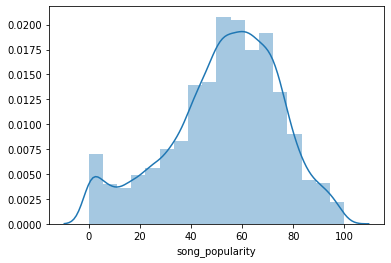

In [13]:
sns.distplot(df['song_popularity'], bins=18,hist=True)

In [14]:
df['song_duration_ms'].unique()

array(['262333', '216933', '231733', ..., '182211', '352280', '193533'],
      dtype=object)

In [15]:
df['song_duration_ms'] = df['song_duration_ms'].dropna()

In [16]:
df['song_duration_ms'] = df['song_duration_ms'].str.strip('kg')

In [17]:
ms = df['song_duration_ms'].str.len()
df.loc[ms > 6, 'song_duration_ms'] = np.nan

In [18]:
df['song_duration_ms'] = df['song_duration_ms'].dropna()

In [19]:
df['song_duration_ms'] = df['song_duration_ms'].astype('float') 

In [20]:
df['acousticness'] = df['acousticness'].str.strip('kg')
df['acousticness'] = df['acousticness'].str.strip('mol/L')

In [21]:
df['acousticness'] = df['acousticness'].astype('float') 

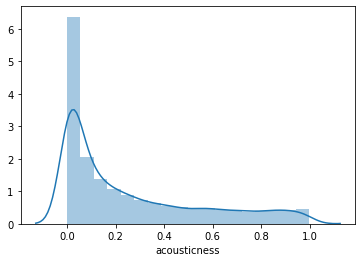

In [22]:
sns.distplot(df['acousticness'], bins=18,hist=True)

In [23]:
df['acousticness'].unique()

array([0.00552 , 0.0103  , 0.00817 , ..., 0.000686, 0.00798 , 0.000725])

In [24]:
df['danceability'] = df['danceability'].str.strip('mol/L')

In [25]:
df['danceability'] = df['danceability'].astype('float') 

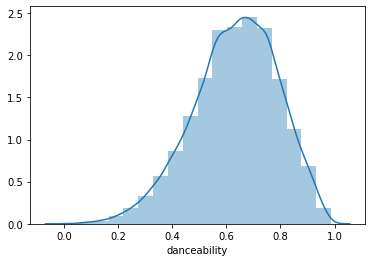

In [26]:
sns.distplot(df['danceability'], bins=18,hist=True)

In [27]:
df['energy'].unique()

array(['0.682', '0.853', '0.463', ..., '0.0991', '0.102', '0.0409'],
      dtype=object)

In [28]:
errors = df[df['energy'] == 'nao_sei']
errors

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
72,Banana Clip - Spanish Version,57.0,202373.0,0.107,0.398,nao_sei,0.0,1.0,0.121,-5.626,0,0.12,83.82799999999997,4,0.719


In [29]:
df.drop([72], axis= 0, inplace = True)

In [30]:
df['energy'] = df['energy'].astype('float') 

In [31]:
df['energy'].mean()

0.6450090925503137

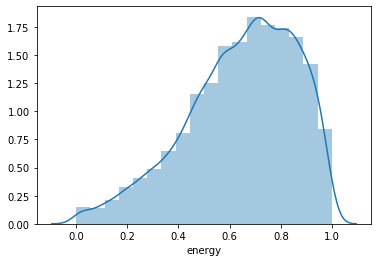

In [32]:
sns.distplot(df['energy'], bins=18,hist=True)

In [33]:
df[df['instrumentalness'] == 'nao_sei']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
923,Sunny Came Home,62.0,264200.0,0.344,0.554,0.580,nao_sei,11.0,0.0989,-8.05,0,0.0322,167.83,4,0.402
1392,Love Will Tear Us Apart,60.0,223340.0,0.951,0.375,0.217,nao_sei,3.0,0.107,-12.425999999999998,1,0.0344,96.239,3,0.139


In [34]:
df.drop([923, 1392], axis = 0, inplace = True)

In [35]:
df['instrumentalness'] = df['instrumentalness'].astype('float')

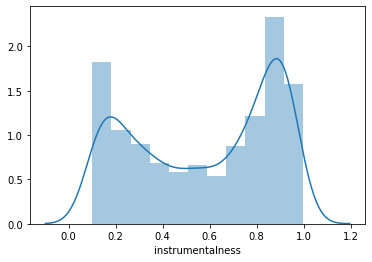

In [36]:
p = df.query('0.1<instrumentalness<1')
sns.distplot(p['instrumentalness'])

In [37]:
df['instrumentalness'].min()

0.0

In [38]:
df[df['liveness'] == 'nao_sei']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
125,Live Your Life (feat. Rihanna),76.0,338853.0,0.071000,0.375,0.862,0.000,11.0,nao_sei,-3.363,0,0.255,159.841,4,0.478
1046,Blister in the Sun - 2002 Remastered Version,69.0,144333.0,0.219000,0.701,0.261,0.000,0.0,nao_sei,-19.846,1,0.0938,97.042,4,0.890
1181,Break My Stride,62.0,180240.0,0.200000,0.901,0.654,0.000,10.0,nao_sei,-10.15,1,0.0655,110.131,4,0.781
6616,From Out of Nowhere,36.0,139293.0,0.000004,0.321,0.929,0.925,2.0,nao_sei,-4.367,1,0.0584,96.25,3,0.309


In [39]:
df.drop([125, 1046, 1181, 6616], axis= 0, inplace = True)

In [40]:
df['liveness'] = df['liveness'].astype('float')

In [41]:
df['liveness'].describe()

count    18827.000000
mean         0.179666
std          0.144010
min          0.010900
25%          0.092900
50%          0.122000
75%          0.221000
max          0.986000
Name: liveness, dtype: float64

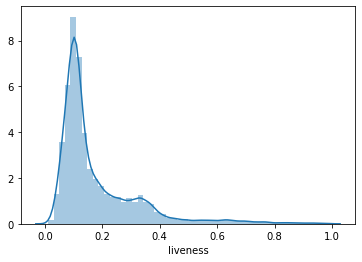

In [42]:
sns.distplot(df['liveness'])

In [43]:
df['key'].describe()

count    18827.000000
mean         5.288894
std          3.614098
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: key, dtype: float64

In [44]:
df['key'] = df['key'].astype('str')

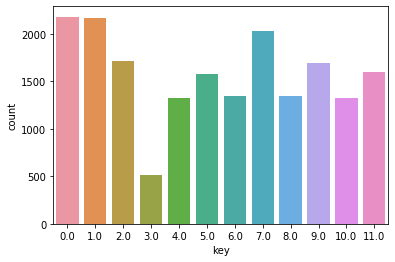

In [45]:
leg = ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0']
sns.countplot(df['key'], order = leg)

In [46]:
df['loudness'].describe()

count      18827
unique      8417
top       -4.589
freq          24
Name: loudness, dtype: object

In [47]:
df[df['loudness'] == 'nao_sei']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
1706,Issa Goal,50.0,216774.0,0.161,0.708,0.767,0.0,4.0,0.328,nao_sei,0,0.258,124.453,4,0.853


In [48]:
df.drop([1706], axis = 0, inplace = True)

In [49]:
df['loudness'] = df['loudness'].astype('float')

In [50]:
df['loudness'].describe()

count    18826.000000
mean        -7.446917
std          3.827175
min        -38.768000
25%         -9.044000
50%         -6.554500
75%         -4.908250
max          1.585000
Name: loudness, dtype: float64

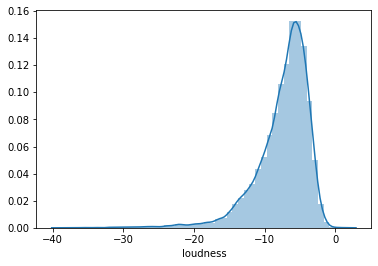

In [51]:
sns.distplot(df['loudness'])

In [52]:
df['audio_mode'].describe()

count     18826
unique        3
top           1
freq      11826
Name: audio_mode, dtype: object

In [53]:
df['audio_mode'].unique()

array(['1', '0', 'nao_sei'], dtype=object)

In [54]:
df[df['audio_mode'] == 'nao_sei']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
6587,Lhhc,48.0,189985.0,0.00732,0.629,0.993,0.0,7.0,0.148,-1.277,nao_sei,0.214,137.023,4,0.329


In [55]:
df.drop([6587], axis = 0, inplace = True)

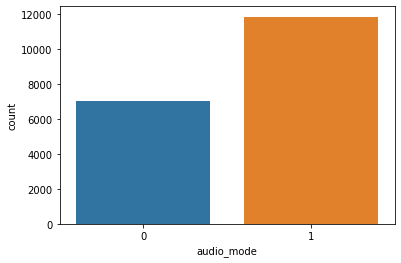

In [56]:
sns.countplot(df['audio_mode'])

In [57]:
df['speechiness'].describe()

count      18825
unique      1225
top       0.0337
freq          66
Name: speechiness, dtype: object

In [58]:
df[df['speechiness'] == '0.nao_sei']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
819,Keep on Loving You - Remastered,71.0,200293.0,0.0519,0.306,0.722,0.0,0.0,0.117,-5.963,1,0.nao_sei,174.732,4,0.41


In [59]:
df.drop([819], axis = 0, inplace = True)

In [60]:
df['speechiness'] = df['speechiness'].astype('float')

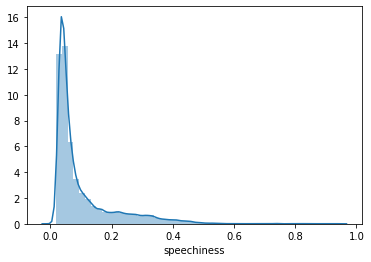

In [61]:
sns.distplot(df['speechiness'])

In [62]:
df['speechiness'].min()

0.0

In [63]:
df['tempo'].describe()

count       18824
unique      12107
top       125.978
freq           20
Name: tempo, dtype: object

In [64]:
df[df['tempo'] == 'nao_sei']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
1564,Rude (Acoustic),74.0,223854.0,0.358,0.736,0.847,0.0,1.0,0.101,-4.287,1,0.0756,nao_sei,4,0.915


In [65]:
df.drop([1564], axis = 0, inplace = True)

In [66]:
df['tempo'] = df['tempo'].astype('float')

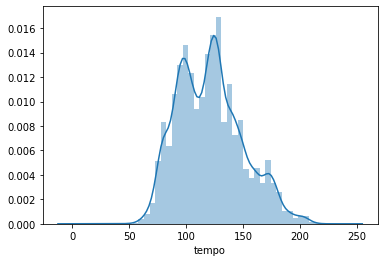

In [67]:
sns.distplot(df['tempo'])

In [68]:
df['time_signature'].describe()

count     18823
unique        7
top           4
freq      17742
Name: time_signature, dtype: object

In [69]:
df['time_signature'].unique()

array(['4', '3', '1', '5', '2800000000', 'nao_sei', '0'], dtype=object)

In [70]:
df[df['time_signature'] == 'nao_sei']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
521,Nobody's Fool,16.0,287400.0,0.0478,0.367,0.445,0.00284,9.0,0.199,-13.615,0,0.0286,67.197,nao_sei,0.149


In [71]:
df.drop([521], axis = 0, inplace = True)

In [72]:
df['time_signature'] = df['time_signature'].astype('float')

In [73]:
df['time_signature'] = df['time_signature'].astype('int')

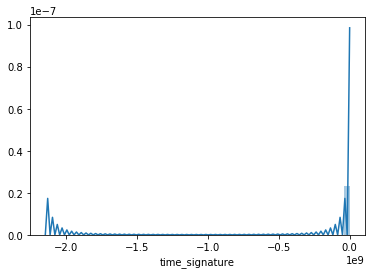

In [74]:
sns.distplot(df['time_signature'])

In [75]:
df['time_signature'].describe()

count    1.882200e+04
mean    -1.140904e+05
std      1.565298e+07
min     -2.147484e+09
25%      4.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: time_signature, dtype: float64

In [76]:
df['time_signature'].min()

-2147483648

In [77]:
df[df['time_signature'] == -2147483648]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
149,What Makes You Beautiful,69.0,198053.0,0.00761,0.729,0.771,0.0,4.0,0.087,-2.451,1,0.0725,125.011,-2147483648,0.873


In [78]:
df.drop([149], axis = 0, inplace = True)

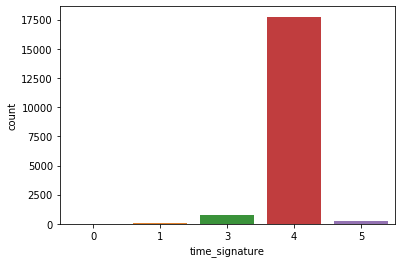

In [79]:
sns.countplot(df['time_signature'])

In [80]:
df['audio_valence'].describe()

count    18821.000000
mean         0.527937
std          0.244609
min          0.000000
25%          0.335000
50%          0.527000
75%          0.725000
max          0.984000
Name: audio_valence, dtype: float64

In [81]:
df['audio_valence'].unique()

array([0.474 , 0.37  , 0.324 , ..., 0.0935, 0.0277, 0.0592])

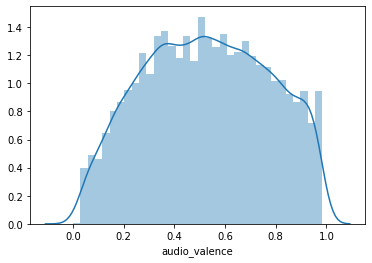

In [82]:
sns.distplot(df['audio_valence'])

ELIMINAÇÃO DE LINHAS DUPLICADAS

In [83]:
duplicates = df.duplicated()
df.drop_duplicates(inplace = True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14918 entries, 0 to 18834
Data columns (total 15 columns):
song_name           14918 non-null object
song_popularity     14918 non-null float64
song_duration_ms    14913 non-null float64
acousticness        14918 non-null float64
danceability        14918 non-null float64
energy              14918 non-null float64
instrumentalness    14918 non-null float64
key                 14918 non-null object
liveness            14918 non-null float64
loudness            14918 non-null float64
audio_mode          14918 non-null object
speechiness         14918 non-null float64
tempo               14918 non-null float64
time_signature      14918 non-null int32
audio_valence       14918 non-null float64
dtypes: float64(11), int32(1), object(3)
memory usage: 1.8+ MB


CHECAGEM FINAL

In [85]:
inconsist_cat = set(df).difference(df)
inconsist_cat

set()

In [86]:
df = df.dropna()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14913 entries, 0 to 18834
Data columns (total 15 columns):
song_name           14913 non-null object
song_popularity     14913 non-null float64
song_duration_ms    14913 non-null float64
acousticness        14913 non-null float64
danceability        14913 non-null float64
energy              14913 non-null float64
instrumentalness    14913 non-null float64
key                 14913 non-null object
liveness            14913 non-null float64
loudness            14913 non-null float64
audio_mode          14913 non-null object
speechiness         14913 non-null float64
tempo               14913 non-null float64
time_signature      14913 non-null int32
audio_valence       14913 non-null float64
dtypes: float64(11), int32(1), object(3)
memory usage: 1.8+ MB


SEPARAÇÃO DAS 100 MÚSICAS MAIS POPULARES PARA MELHOR VISUALIZAÇÃO

In [88]:
df_popular = df.sort_values(['song_popularity', 'liveness', 'audio_mode'], ascending = [False, False, False])
df_popular = df_popular[:99]
df_popular.tail()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
11338,Shape of You,89.0,233712.0,0.58100,0.825,0.652,0.000000,1.0,0.0931,-3.183,0,0.0802,95.977,4,0.931
11871,Lean Wit Me,89.0,175755.0,0.04140,0.665,0.651,0.000000,1.0,0.0896,-5.515,1,0.1560,163.935,4,0.237
4643,IDGAF,89.0,217946.0,0.04030,0.836,0.544,0.000000,7.0,0.0824,-5.975,1,0.0943,97.028,4,0.510
6538,X - Remix,89.0,235746.0,0.05610,0.663,0.696,0.000038,9.0,0.0778,-4.957,0,0.1030,180.113,4,0.738
18305,I'm a Mess,89.0,195519.0,0.00281,0.630,0.694,0.000000,11.0,0.0719,-6.257,0,0.0253,97.005,4,0.216


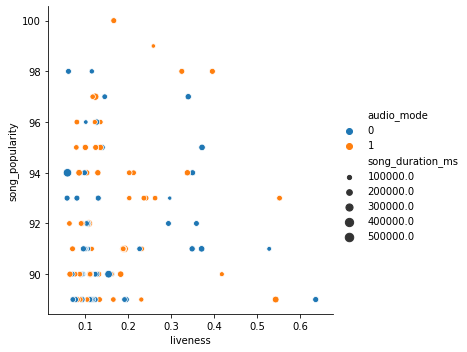

In [89]:
sns.relplot(x='liveness', y='song_popularity', data = df_popular, kind='scatter', size = 'song_duration_ms', hue = 'audio_mode')

Músicas com altos níveis de "liveness" tendem a não ser tão populares
Músicas próximas à 200000 ms tendem a ser mais populares
A maioria das músicas se concentra na faixa de liveness 0.1

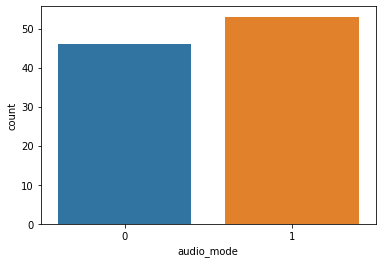

In [90]:
sns.countplot(df_popular['audio_mode'])

In [91]:
zero = len(df_popular[df_popular['audio_mode'] == '0'])
one = len(df_popular[df_popular['audio_mode'] == '1'])

proportion_df_popular = (zero/(zero + one)) 
proportion_df_popular

0.46464646464646464

In [92]:
df_popular2 = df.sort_values(['song_popularity', 'liveness', 'audio_mode'], ascending = [False, False, False])
df_popular2 = df_popular2[:499]

zero = len(df_popular2[df_popular2['audio_mode'] == '0'])
one = len(df_popular2[df_popular2['audio_mode'] == '1'])

proportion_df_popular2 = (zero/(zero + one)) 
proportion_df_popular2

0.3907815631262525

In [93]:
df_popular3 = df.sort_values(['song_popularity', 'liveness', 'audio_mode'], ascending = [False, False, False])
df_popular3 = df_popular3[:2099]

zero = len(df_popular3[df_popular3['audio_mode'] == '0'])
one = len(df_popular3[df_popular3['audio_mode'] == '1'])

proportion_df_popular3 = (zero/(zero + one)) 
proportion_df_popular3

0.3701762744163888

Alta concentração de audio mode 0 nos 100 mais populares, essa cocentração vai se diluindo com o aumento da amostra analisada

In [94]:
amostra = len(df_popular[df_popular['audio_mode'] == '0'])
total = len(df[df['audio_mode'] == '0'])

amostra1 = len(df_popular[df_popular['audio_mode'] == '1'])
total1 = len(df[df['audio_mode'] == '1'])


percentage_high_popularity1 = amostra1/total1

percentage_high_popularity0 = amostra/total

print('{} \n{}'.format(percentage_high_popularity1, percentage_high_popularity0))

0.0056245357104955955 
0.008378870673952642


Nos 100 dados mais populares, a concentração de audio mode 0 no top 100 pelo total de audio mode 0 é cerca de 50% maior do que a concentração de audio mode 1 no top 100 pelo total de audio mode 1

Isso implica que músicas com audiomode 0 possuem maior probabilidade de estarem no top 100 em relação ao total de musicas de audio mode 0 produzidas

In [95]:
dict_audiomode = { 'song groups':['top 100', 'top 500', 'top 2100'],
                   '% audio mode 0':[46.64, 39.08, 37.02] }

In [96]:
data_audiomode = pd.DataFrame(dict_audiomode)

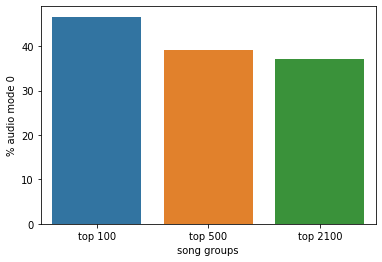

In [97]:
sns.barplot(x='song groups', y='% audio mode 0', data = data_audiomode, order = ['top 100', 'top 500', 'top 2100'])

Alta concentração de audio mode 0 nos 100 mais populares, essa cocentração vai se diluindo com o aumento da amostra analisada

Existem menos músicas classificadas como “audio_mode0”, Isso implica que músicas com este atributo possuem maior probabilidade de estarem no top 100 em relação ao total de musicas deste categoria produzidas

Em geral, para cada 100 músicas de perfil audio_mode0 no spotify, 0.83 delas estão entre as 100 mais populares. Por outro lado, para cada 100 de audio_mode1, apenas 0.56 encontram-se nessa faixa de popularidade.


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14913 entries, 0 to 18834
Data columns (total 15 columns):
song_name           14913 non-null object
song_popularity     14913 non-null float64
song_duration_ms    14913 non-null float64
acousticness        14913 non-null float64
danceability        14913 non-null float64
energy              14913 non-null float64
instrumentalness    14913 non-null float64
key                 14913 non-null object
liveness            14913 non-null float64
loudness            14913 non-null float64
audio_mode          14913 non-null object
speechiness         14913 non-null float64
tempo               14913 non-null float64
time_signature      14913 non-null int32
audio_valence       14913 non-null float64
dtypes: float64(11), int32(1), object(3)
memory usage: 1.8+ MB


<Figure size 1080x720 with 0 Axes>

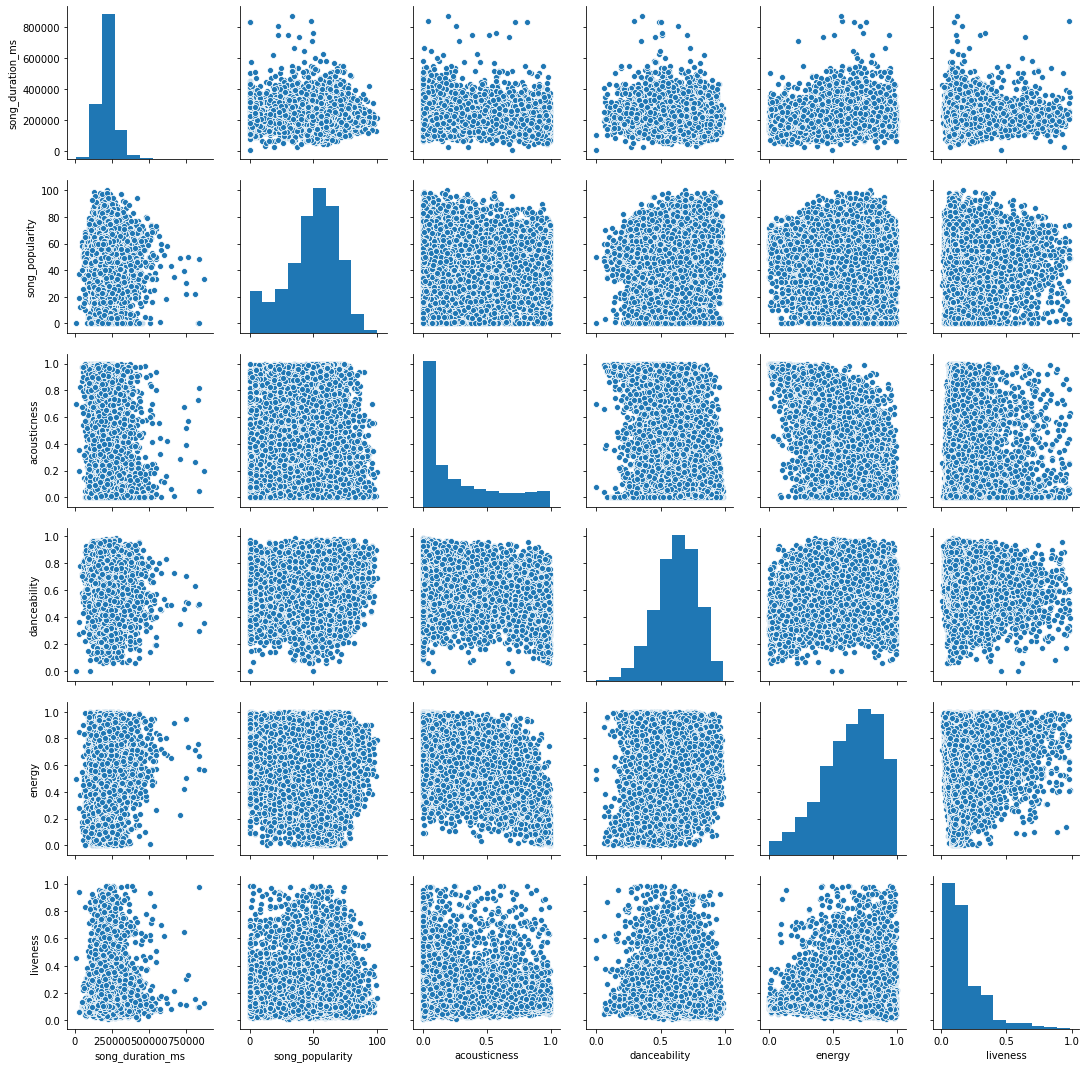

In [99]:
plt.figure(figsize=(15,10))
sns.pairplot(df[['song_duration_ms','song_popularity', 'acousticness', 'danceability', 'energy', 'liveness']])
plt.show()

O pairplot não evidencia correlações expressivas entre variáveis, mas permite a visualização da concentração destas de maneira satisfatória, como a grande concentração de músicas na faixa de 250.000 ms de duração.

No geral, os pontos se encontram muito próximos e ocupam grande parte do gráfico sem tendências definidas

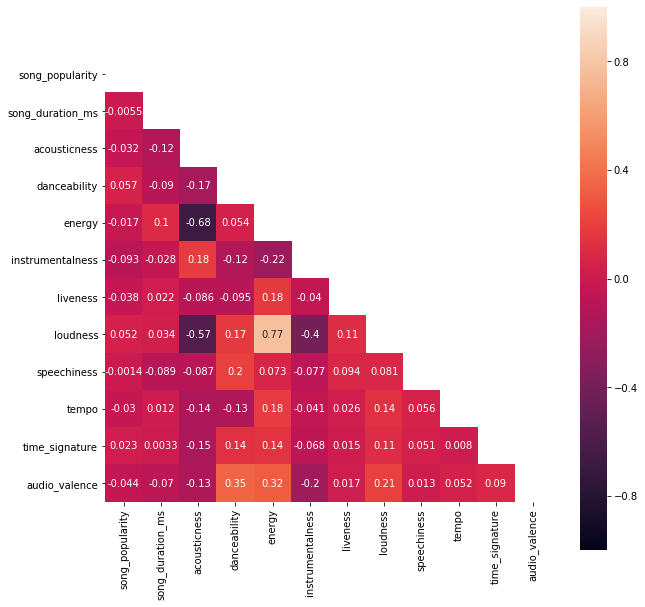

In [100]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1)
plt.show()

A maior correlação encontrada no heatmap ocorre entre energy e loudness, ou seja, quanto maior a sensação de amplitude, maior a energia que a música é capaz de transmitir ao ouvinte.

Outras correlações, não tão fortes, podem ser destacadas, como danceability e audio_valence, ou seja, quanto mais a música instigar a dança, mais felicidade ela é capaz de proporcionar e vice-versa.

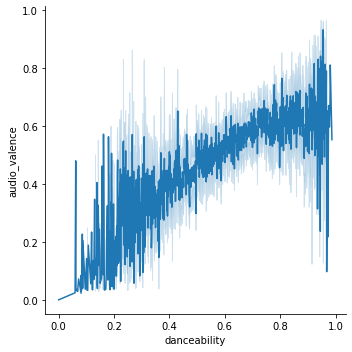

In [101]:
sns.relplot(x='danceability', y='audio_valence', data=df, kind='line')

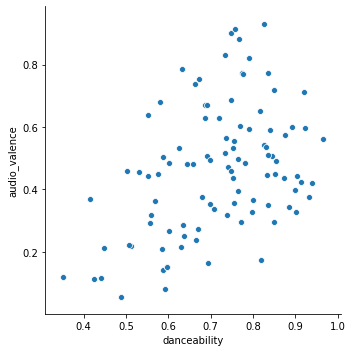

In [102]:
sns.relplot(x='danceability', y='audio_valence', data=df_popular, kind='scatter')

Nesses gráficos, a relação entre danceability é explorada, tanto em formato de linha quanto de scatter. Pode-se notar uma tendência de correlação, mesmo que tal fato não se apresente de forma tão linear, com alguns pontos difusos.

C:\Users\guisg\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


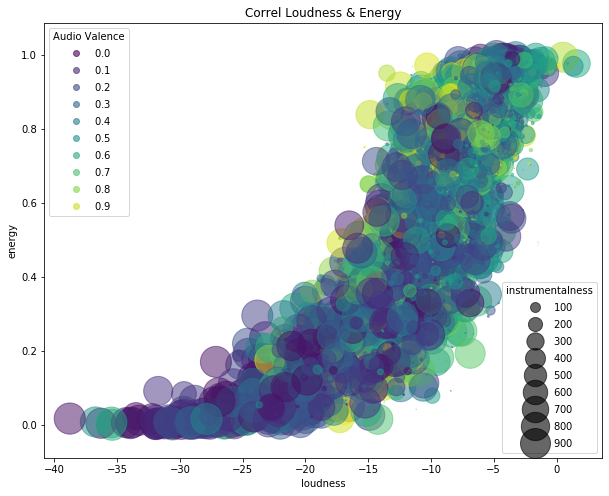

In [103]:
np_liv = np.array(df['instrumentalness'])
np_liv = np_liv * 1000

plt.figure(figsize=(10,8))

scatter = plt.scatter(df['loudness'], df['energy'], s = np_liv, c = df['audio_valence'], alpha=.5)

xlab = 'loudness'
ylab = 'energy'
title = 'Correl Loudness & Energy'

plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)

ax = plt.subplot()
legend1 = plt.legend(*scatter.legend_elements(prop="colors", alpha = 0.6), loc="upper left", title = 'Audio Valence')
ax.add_artist(legend1)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = plt.legend(handles, labels, loc="lower right", title='instrumentalness')

plt.show()

A partir do gráfico, é possível perceber de maneira mais intuitiva a relação entre energy e loudness. A variável auxiliar de tamanho dos pontos instrumentalness se encontra difusa, o que representa uma baixa influência sobre as variáveis principais.

Por outro lado, a variável de cor audio_valence evidencia uma tendência de clareamento  com o crescimento das variáveis principais, pela correlação de 0.21 com loudness e 0.32 com energy.

In [104]:
df['time_signature'] = df['time_signature'].astype('str')

In [105]:
df['key'] = df['key'].astype('str')

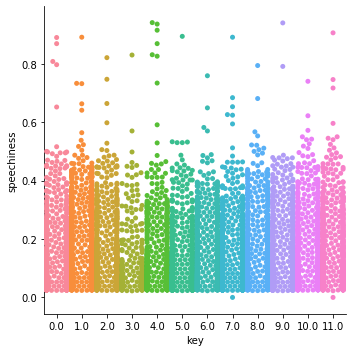

In [106]:
leg = ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0']
sns.catplot(x='key', y='speechiness', data=df, kind='swarm', order = leg)

O gráfico em questão evidencia uma grande concentração de músicas no intervalo de speechiness entre 0 e 0.4. Tal padrão de concentração acontece em todas as keys de maneira semelhante

In [107]:
df['time_signature'].unique()

array(['4', '3', '1', '5', '0'], dtype=object)

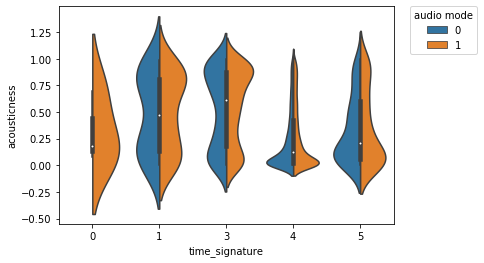

In [108]:
sns.violinplot(x='time_signature', y='acousticness', hue='audio_mode', data=df, split=True, height = 7)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title= 'audio mode')

Nota-se uma ausência de músicas com time_signature igual a 0.

As músicas de time_signature 1 e 3 apresentam grande semelhança de distribuição. Apresentam dois picos de distribuição bem definidos: no intervalo (0,0.25) e no intervalo (0.75, 1) 

As músicas de time_signature 4 estão concentradas na faixa de 0 de acousticness com grande intensidade. Apesar de tal padrão de concentração se dar com as músicas de time_signature 5, ele ocorre de maneira significativamente menos intensa.

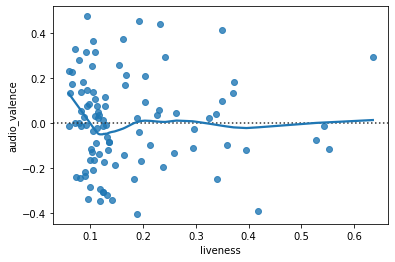

In [109]:
sns.residplot(x='liveness', y='audio_valence', data=df_popular, lowess = True, robust= True)

O gráfico em questão delineou um polinômio de quatro raízes no intervalo de liveness ligeiramente maior do que o intervalo entre 0.1 e 0.6. O polinômio possui valor de máximo local em seu início e mínimo global próximo a 0.1, fato que indica altas taxas de variações de audio_valence para baixos níveis de liveness.

Nesse contexto, uma série de resíduos foram plotados nos níveis mais baixos de liveness, o que confirma a ampla variedade de audio_valence em regiões de liveness menores.

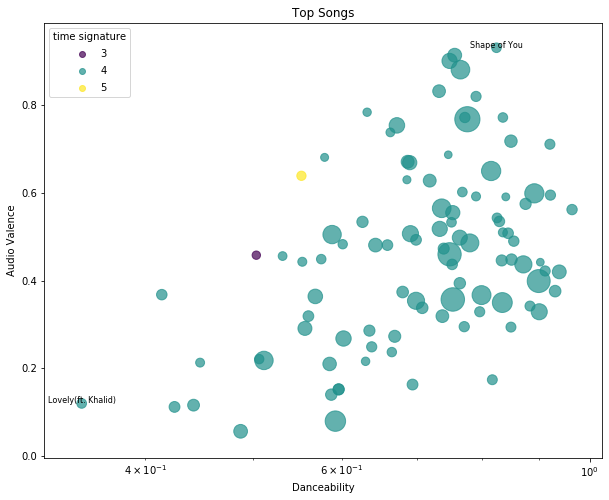

In [110]:
np_liv = np.array(df_popular['liveness'])
np_liv = np_liv * 1000

plt.figure(figsize=(10,8))
scatter = plt.scatter(df_popular['danceability'], df_popular['audio_valence'], s = np_liv, c = df_popular['time_signature'], alpha=.7)
plt.xscale('log')

xlab = 'Danceability'
ylab = 'Audio Valence'
title = 'Top Songs'

plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)


plt.text(0.351, 0.12, 'Lovely(ft. Khalid)', fontsize = 8, horizontalalignment = 'center')
plt.text(0.825, 0.931, 'Shape of You', fontsize = 8, horizontalalignment = 'center')

legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper left", title="time signature")
plt.show()

Cada ponto do gráfico evidencia uma música no data frame entre as 100 mais populares. A partir disso, é possível notar uma correlação não tão forte, entre danceability e audio_valence.

As cores do gráfico representam a time_signature de cada música. Como é possível visualizar, as músicas de time_signature 4 são amplamente dominantes, enquanto a 3 e a 5 possuem apenas 1 representante cada entre os 100 mais populares.

In [111]:
min = df_popular[df_popular['danceability'] == df_popular['danceability'].min()]
min

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4732,lovely (with Khalid),90.0,200185.0,0.934,0.351,0.296,0.0,4.0,0.095,-10.109,0,0.0333,115.284,4,0.12


In [112]:
max = df_popular[df_popular['audio_valence'] == df_popular['audio_valence'].max()]
max

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
11338,Shape of You,89.0,233712.0,0.581,0.825,0.652,0.0,1.0,0.0931,-3.183,0,0.0802,95.977,4,0.931


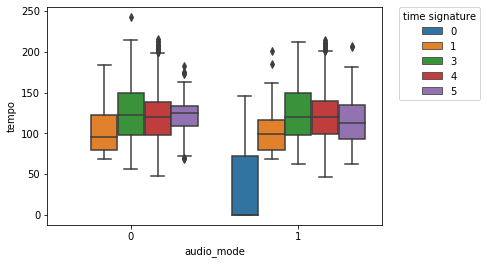

In [113]:
sns.boxplot(x='audio_mode', y='tempo', hue='time_signature', data=df)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='time signature')

É possível visualizar grandes semelhanças entre os boxplots dos dois grupos de audio mode.

Em ambos, o boxplot de time signature 3 possui o maior valor de tempo, com a presença de outliers em um contexto de audio mode 0.

Pode ser notada uma semelhança grande entre a mediana dos boxplots de time signatures 3 e 4, com o terceiro quartil do 3 superior ao terceiro quartil do 4 em ambos os audio modes.

Não existem músicas de audio ode 0, no df, com time signature e tempo nulos. No caso de audio mode 1, o boxplot de time signature igual a 0 possui configuração diferente dos demais, com cerca de 75% das músicas com tempo menor do que 75.

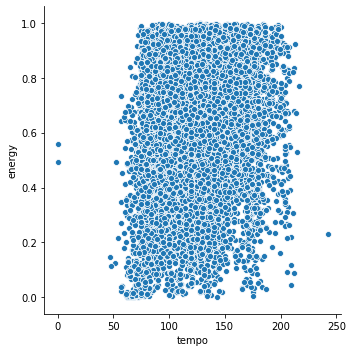

In [114]:
sns.relplot(x='tempo', y='energy', data=df, kind='scatter')

É possível notar uma grande concentração de músicas entre as faixas de tempo 50 e 200. 

Não há correlação explícita entre tempo e energy.